In [1]:
import tensorflow as tf
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
tf.__version__

NameError: name 'tf' is not defined

In [10]:
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt

(x_train , y_train) , (x_test,y_test) =mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=3)



Epoch 1/3


1875/1875 [==============================] - 36s 16ms/step - loss: 0.3301 - accuracy: 0.9093
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1247 - accuracy: 0.9619
Epoch 3/3
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0845 - accuracy: 0.9740


In [11]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0962 - accuracy: 0.9712
0.0962064117193222 0.9711999893188477


In [13]:
model.save('epic_num_reader_model')

INFO:tensorflow:Assets written to: epic_num_reader_model\assets


INFO:tensorflow:Assets written to: epic_num_reader_model\assets


In [14]:
new_model = tf.keras.models.load_model('epic_num_reader_model')

In [15]:
predection = new_model.predict([x_test])
print(predection)

313/313 [==============================] - 2s 7ms/step
[[1.38962832e-07 7.71067761e-08 1.08879518e-04 ... 1.16258747e-11
  7.94496413e-12 4.11712808e-12]
 [3.15247051e-09 1.23206968e-03 9.98728216e-01 ... 4.27503546e-13
  4.28886256e-13 1.04704616e-13]
 [1.72410893e-07 9.99235272e-01 1.01565391e-04 ... 7.20218774e-09
  8.16479062e-09 6.86683288e-09]
 ...
 [6.30486667e-08 1.44948001e-06 3.16538774e-07 ... 3.88554163e-12
  2.86425657e-11 6.15143908e-11]
 [1.90723176e-06 1.97704549e-06 7.34954924e-08 ... 2.20688624e-11
  6.63950700e-11 5.81582109e-11]
 [5.00190845e-06 2.10486988e-07 1.09893270e-03 ... 1.72984229e-12
  1.21475443e-12 5.81209690e-12]]


In [16]:
import numpy as np

print(np.argmax(predection[0]))

7


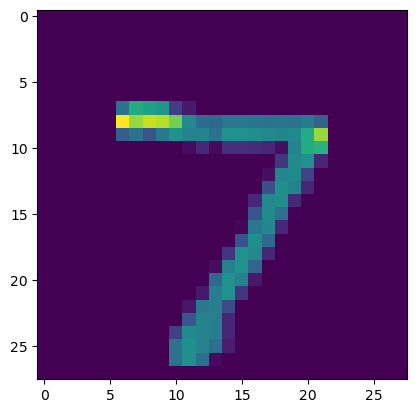

In [17]:
plt.imshow(x_test[0])
plt.show()

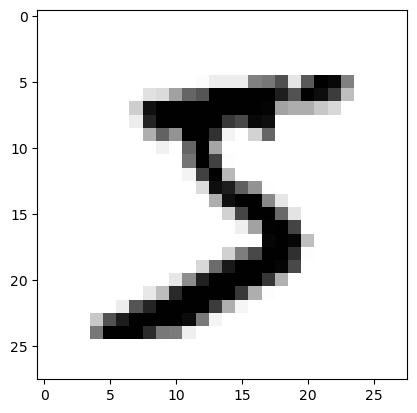

In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()